In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
sns.set()

2023-02-10 14:49:29.967045: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-10 14:49:32.067060: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-10 14:49:32.067289: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-10 14:49:32.067300: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
soggetto = "soggetto_1"

In [3]:
# read soggetto_1_input.csv
df_input = pd.read_csv( soggetto + '_input.csv', sep=',')
# remove SIGMA and bit_type columns
df_input = df_input.drop(['SIGMA', 'bit_type'], axis=1)
df_input

,bit,TrRi,RiTr,Plu,Ttra,Ttrb,Tr,MeTr,MoTr,RiRi,MoFo,Mmof,MoRi,MeRi,Ri,Comp
0,0.934579,0.01,0.01,0.01,0,0.51,0.01,0.41,0,0,0,0,0,0.50,0.01,0.75
1,0.065421,0.01,0.01,0.01,0,0.51,0.01,0.41,0,0,0,0,0,0.50,0.01,0.75
2,0.949367,0.01,0.01,0.01,0,0.53,0.01,0.54,0,0,0,0,0,0.54,0.01,0.79
3,0.050633,0.01,0.01,0.01,0,0.53,0.01,0.54,0,0,0,0,0,0.54,0.01,0.79
4,0.955414,0.01,0.01,0.01,0,0.56,0.01,0.54,0,0,0,0,0,0.55,0.01,0.80
5,0.044586,0.01,0.01,0.01,0,0.56,0.01,0.54,0,0,0,0,0,0.55,0.01,0.80
6,0.937500,0.01,0.01,0.01,0,0.52,0.01,0.41,0,0,0,0,0,0.53,0.01,0.76
7,0.062500,0.01,0.01,0.01,0,0.52,0.01,0.41,0,0,0,0,0,0.53,0.01,0.76
8,0.917431,0.01,0.01,0.01,0,0.25,0.01,0.54,0,0,0,0,0,0.24,0.01,0.69
9,0.082569,0.01,0.01,0.01,0,0.25,0.01,0.54,0,0,0,0,0,0.24,0.01,0.69


In [4]:
# read soggetto_1_targets.csv
df_target = pd.read_csv(soggetto + '_targets.csv', sep=',')
df_target

,TrRi,RiTr,Plu,Ttra,Ttrb,Tr,MeTr,MoTr,RiRi,MoFo,Mmof,MoRi,MeRi,Ri,Comp
0,0.1129,0.1129,0.1129,0.105,0.5079,0.1129,0.4289,0.105,0.105,0.105,0.105,0.105,0.5000,0.1129,0.6975
1,0.0100,0.0100,0.0100,0.000,0.5100,0.0100,0.4100,0.000,0.000,0.000,0.000,0.000,0.5000,0.0100,0.7500
2,0.0884,0.0884,0.0884,0.080,0.5252,0.0884,0.5336,0.080,0.080,0.080,0.080,0.080,0.5336,0.0884,0.7436
3,0.0100,0.0100,0.0100,0.000,0.5300,0.0100,0.5400,0.000,0.000,0.000,0.000,0.000,0.5400,0.0100,0.7900
4,0.0786,0.0786,0.0786,0.070,0.5516,0.0786,0.5344,0.070,0.070,0.070,0.070,0.070,0.5430,0.0786,0.7580
5,0.0100,0.0100,0.0100,0.000,0.5600,0.0100,0.5400,0.000,0.000,0.000,0.000,0.000,0.5500,0.0100,0.8000
6,0.1080,0.1080,0.1080,0.100,0.5160,0.1080,0.4280,0.100,0.100,0.100,0.100,0.100,0.5240,0.1080,0.7080
7,0.0100,0.0100,0.0100,0.000,0.5200,0.0100,0.4100,0.000,0.000,0.000,0.000,0.000,0.5300,0.0100,0.7600
8,0.1423,0.1423,0.1423,0.135,0.3175,0.1423,0.5292,0.135,0.135,0.135,0.135,0.135,0.3102,0.1423,0.6387
9,0.0100,0.0100,0.0100,0.000,0.2500,0.0100,0.5400,0.000,0.000,0.000,0.000,0.000,0.2400,0.0100,0.6900


In [5]:
# create neural network with an input layer, a hidden layer and an output layer respectively with 16, 15 and 15 neurons
model = keras.Sequential([
    layers.Dense(16, activation='tanh', input_shape=[len(df_input.keys())]),
    layers.Dense(15, activation='tanh'),
    layers.Dense(15, activation='tanh'),
])

# compile the model with the Adam optimizer and the mean squared error loss function
model.compile(optimizer='SGD',
                loss='mse',
                metrics=['mae', 'mse'])

# train the model with the input and target data
history = model.fit(
    df_input, df_target,
    epochs=10000, verbose=0, shuffle=False)

2023-02-10 14:49:34.481224: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-10 14:49:34.481357: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (davide-Inspiron-3891): /proc/driver/nvidia/version does not exist
2023-02-10 14:49:34.482710: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# visualize the loss function
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,epoch
9995,0.001874,0.028512,0.001874,9995
9996,0.001874,0.028511,0.001874,9996
9997,0.001874,0.028510,0.001874,9997
9998,0.001874,0.028509,0.001874,9998
9999,0.001874,0.028508,0.001874,9999


<AxesSubplot: xlabel='epoch', ylabel='loss'>

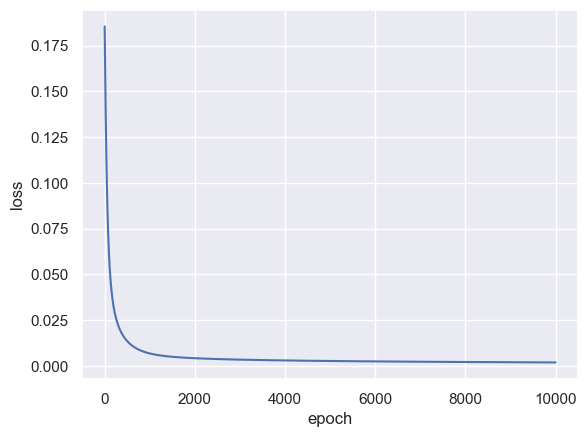

In [7]:
# visualize the loss function with seaborn
sns.lineplot(x='epoch', y='loss', data=hist)